#                <div align="center">Exercice sur le dataset age-gender
    

##                     <div align="center">MOISE EHIMIGAYE SENGHOR

## <div align="center">*UE : Manipulation et Prétraitement de données*

Importons les packages dont nous aurons besoin pour faire l' exercice.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


Importons le dataset à étudier sans oublier le séparateur 

In [2]:
agegender = pd.read_csv("age_gender.csv", sep = ';')

Essayons de l' explorer de maniere succinte.

In [3]:
#un petit visuel du dataset.
agegender.head()

,age,genre
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
#Les variables concernées.
agegender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     23705 non-null  int64
 1   genre   23705 non-null  int64
dtypes: int64(2)
memory usage: 370.5 KB


In [5]:
#taille du dataset
print(agegender.shape)

(23705, 2)


In [6]:
#Recherche de valeurs nulles
agegender.isnull().sum()

age      0
genre    0
dtype: int64

In [7]:
#Recherche de valeurs manquantes
agegender.isna().sum()

age      0
genre    0
dtype: int64

Essayons de voir la distribution de chaque variables

In [8]:
agegender["genre"].value_counts()

0    12391
1    11314
Name: genre, dtype: int64

In [9]:
agegender["age"].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

A première vue,  nous avons un dataset de 23705 lignes et 2 colonnes . Les deux variables sont l' age et le genre , la première est continue la seconde est discrète. Nous remarquons qu' il n ' y a pas de valeurs nulles et manquantes , on peut en déduire que le dataset est relativement propre . 

Nous allons travailler sur une copie du dataset de depart .

In [10]:
agegender1 = agegender.copy()

2) Definissons les arguments  pour la fonction que nous allons utiliser pour couper l’âge des individus par morceaux de cinq  ans et ensuite creeons une visualisation de la variable age.

In [11]:
max_age=agegender1['age'].max()#maximum de la variable
bins=range(0, max_age + 5, 5)#nombre de slice
labels=[f"[{i+1}-{i+5}]" for i in range(0, max_age,5)]#labels des groupes

In [12]:
agegender1['age_group'] = pd.cut(agegender1['age'],bins=bins,labels=labels,right=False)#fonction de slicing

In [13]:
agegender1.head()

,age,genre,age_group
0,1,0,[1-5]
1,1,0,[1-5]
2,1,0,[1-5]
3,1,0,[1-5]
4,1,0,[1-5]


In [14]:
# Compter le nombre d'individus dans chaque groupe d'age tout en prenant soin de faire le tri pour faciliter notre courbe
age_group_counts=agegender1["age_group"].value_counts().sort_index()                                             

In [15]:
print(age_group_counts)

[1-5]        2167
[6-10]        895
[11-15]       589
[16-20]       942
[21-25]      2310
[26-30]      5034
[31-35]      2290
[36-40]      2246
[41-45]      1181
[46-50]      1064
[51-55]      1345
[56-60]       954
[61-65]       730
[66-70]       586
[71-75]       373
[76-80]       326
[81-85]       237
[86-90]       267
[91-95]       102
[96-100]       35
[101-105]      14
[106-110]       5
[111-115]       6
[116-120]       7
Name: age_group, dtype: int64


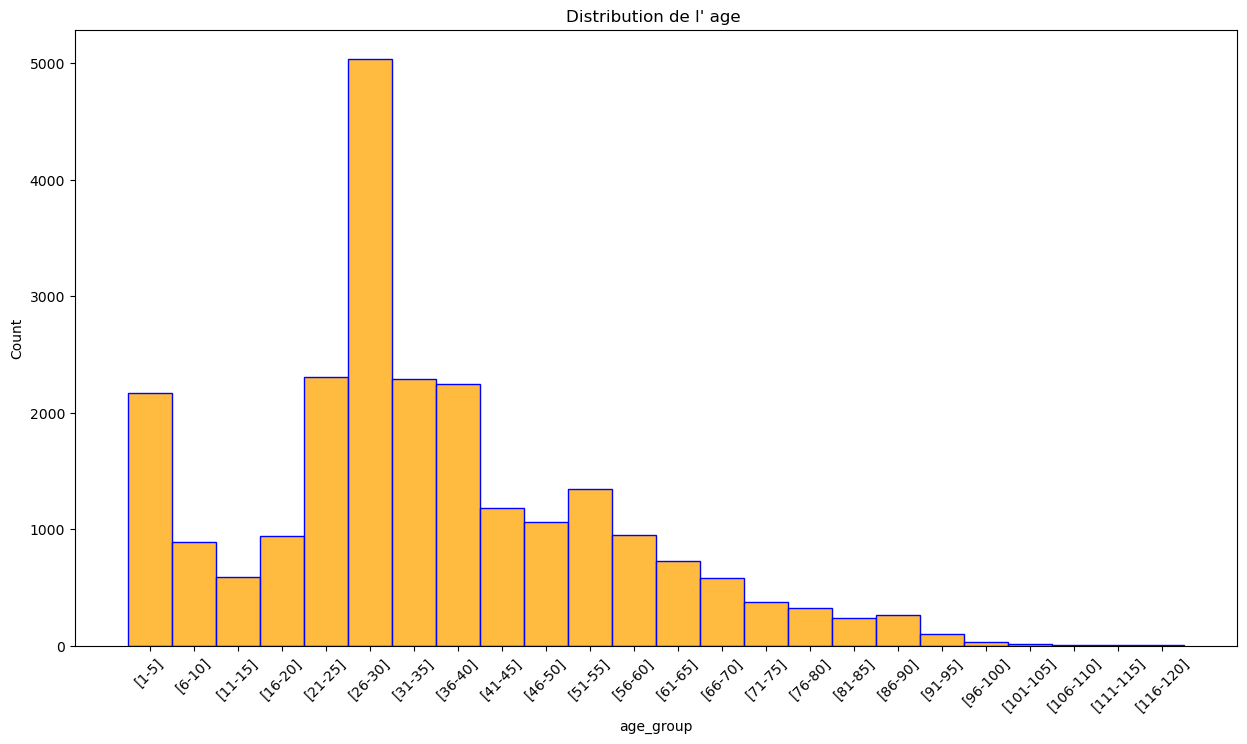

In [16]:
plt.figure(figsize= (15, 8))
ax = sns.histplot(data = agegender1, x = "age_group", color = "orange", edgecolor = 'blue').set(title = "Distribution de l' age ")
plt.xticks(rotation = 45)
plt.savefig("Distribution de l' age.png", orientation = " horizontal ", dpi =300)

Sauvegardons l' image pour un futur rapport :


3) Creeons une visualisations des deux figures correspondant à la distribution des deux variables cote à cote.
Pour faciliter notre travail nous allons commencer par creer une colonne sexe sur la base de la colonne genre.
Nous choisissons de faire un histogramme pour la variable age et un pie chart pour la variable genre.
Pour nous faciliter la tache nous allons creer une colonne conditionnel sexe dont les valeurs seront définis par la variable genre.

In [17]:
agegender1.loc[agegender1["genre"] == 1, 'sexe'] = "homme"
agegender1.loc[agegender1["genre"] == 0, 'sexe'] = "femme"
agegender1.head()

,age,genre,age_group,sexe
0,1,0,[1-5],femme
1,1,0,[1-5],femme
2,1,0,[1-5],femme
3,1,0,[1-5],femme
4,1,0,[1-5],femme


Nous allons creer un dataframe pour faciliter notre pie chart

In [18]:
agegender1["sexe"].value_counts()

femme    12391
homme    11314
Name: sexe, dtype: int64

In [19]:
Sexe = pd.DataFrame(agegender1["sexe"].value_counts())
print(Sexe)

        sexe
femme  12391
homme  11314


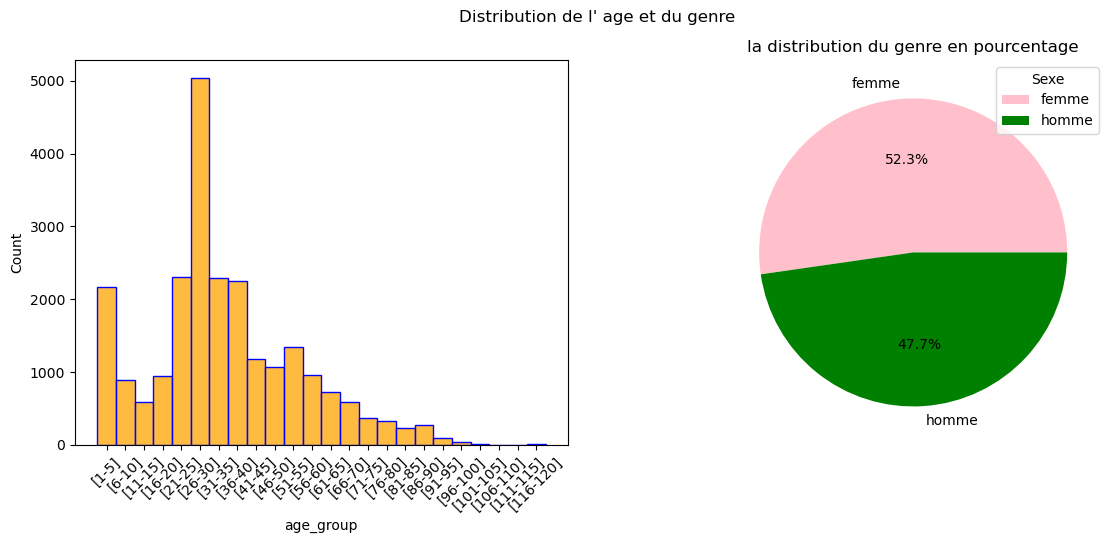

In [20]:
#Nous creons nos subplots sans probleme maintenant .
fig, ax = plt.subplots(1,2,figsize = (14,5))
fig.suptitle("Distribution de l' age et du genre ")
sns.histplot(ax =ax[0],data = agegender1, x = "age_group", color = "orange", edgecolor = 'blue' )
ax[0].tick_params("x", labelrotation = 45)
plt.pie(Sexe['sexe'], labels = Sexe.index,startangle = 0, autopct = '%1.1f%%', colors = ['pink','green'])
plt.legend(title = "Sexe")
ax[1].set_title("la distribution du genre en pourcentage")

fig.savefig("Distribution age et genre.png")


La encore nous avons sauvegardé l' image pour nos futurs rapports.


5 .Représenter dans un même graphique la distribution de l’âge des individus.
Nous avons opter pour un graphique Kde de la densite entre l' age et le sexe (suggestion de Mr Cizel)

C:\Users\toshiba\AppData\Local\Temp\ipykernel_13168\774888963.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( x=agegender1['age'], hue = agegender1['sexe'], shade = True ).set(title = "Distribution de l' age en fontion du sexe")


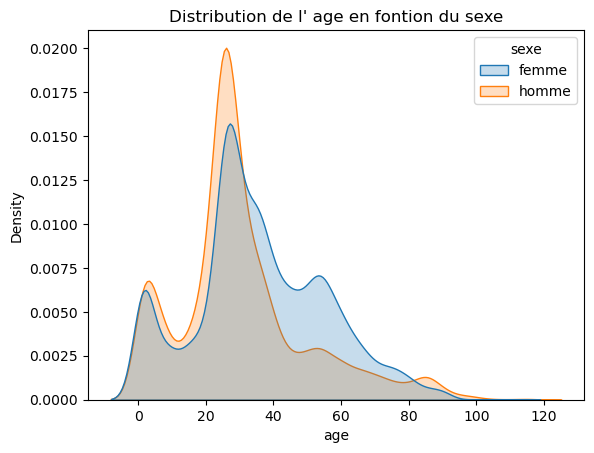

In [21]:
sns.kdeplot( x=agegender1['age'], hue = agegender1['sexe'], shade = True ).set(title = "Distribution de l' age en fontion du sexe")
plt.savefig("Distribution en fonction du sexe.png", orientation = " horizontal ", dpi =300)

6. Jouer sur le parametre alpha pour rendre plus visible les intersections

C:\Users\toshiba\AppData\Local\Temp\ipykernel_13168\1905385092.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot( x=agegender1['age'], hue = agegender1['sexe'], shade = True, alpha = 0.1).set(title = "Distribution de l' age en fontion du sexe (avec une vue sur intersections)")


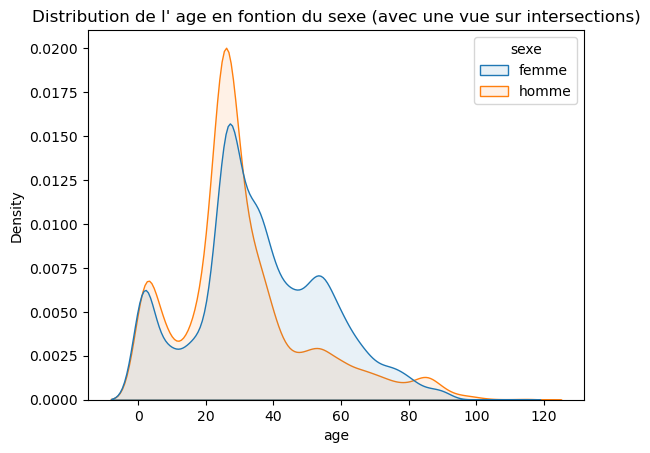

In [22]:
sns.kdeplot( x=agegender1['age'], hue = agegender1['sexe'], shade = True, alpha = 0.1).set(title = "Distribution de l' age en fontion du sexe (avec une vue sur intersections)")

plt.savefig("Distribution de l' age en fonction du sexe(alpha).png", orientation = " horizontal ", dpi =300)

C:\Users\toshiba\AppData\Local\Temp\ipykernel_13168\483608100.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data= agegender1 , x= 'sexe', y = 'age' , estimator= 'mean',ci='sd' ).set(title = 'Age Moyen des hommes et des femmes')


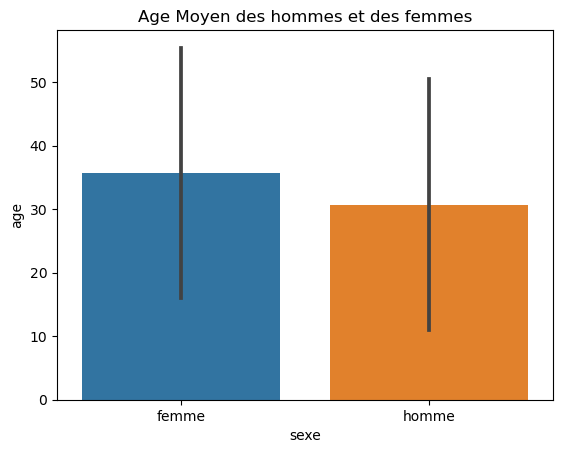

In [23]:
sns.barplot(data= agegender1 , x= 'sexe', y = 'age' , estimator= 'mean',ci='sd' ).set(title = 'Age Moyen des hommes et des femmes')
plt.savefig('Age Moyen des hommes et des femmes.png', orientation = " horizontal ", dpi =300)